---
#### Import libraries and load data

* Loaded the cleaned and feature-selected dataset prepared during the preprocessing phase.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("data_for_modeling.csv")
data.head()

,points_share,VORP,PER,FG,2P,DWS,USG%,WS/48,WS,PTS,FTA
0,0.000,1.7,15.9,5.8,3.0,1.8,21.7,0.150,6.6,17.1,3.1
1,0.000,1.3,20.9,3.0,2.9,1.7,21.7,0.168,3.5,6.8,1.1
2,0.000,0.0,2.9,0.3,0.3,0.0,20.0,-0.083,0.0,1.3,0.7
3,0.056,5.5,24.4,6.7,5.2,2.9,24.2,0.211,10.7,18.5,4.2
4,0.000,4.2,20.6,7.4,4.5,2.0,27.4,0.150,8.6,22.1,5.3


---
#### Analyze dataset

* The dataset includes 12,697 player-season rows and 11 features, covering both traditional and advanced statistics.
* The target variable points_share has a mean of 0.018 and a max of 1.0, indicating that most players did not receive All-NBA votes, while a few received a full vote share.
* Stats like PTS (points per game), USG% (usage rate), and WS (win shares) show wide variance, reflecting a mix of role players and stars.
* PER (Player Efficiency Rating) and VORP (Value Over Replacement Player) span large ranges, with outliers suggesting extremely poor or elite seasons.
* Some minimum values are negative (e.g., VORP, DWS, WS), which is expected in advanced metrics and may influence model interpretation.

In [3]:
data.shape

(12697, 11)

In [4]:
data.describe()

,points_share,VORP,PER,FG,2P,DWS,USG%,WS/48,WS,PTS,FTA
count,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000
mean,0.017643,0.581933,12.825817,3.077672,2.387202,1.195597,18.570237,0.074675,2.482539,8.270859,1.889832
std,0.108413,1.289836,6.215327,2.210685,1.895446,1.136992,5.388191,0.098156,2.832190,6.093909,1.737911
min,0.000000,-2.000000,-54.400000,0.000000,0.000000,-0.600000,0.000000,-1.312000,-2.100000,0.000000,0.000000
25%,0.000000,-0.100000,10.000000,1.400000,1.000000,0.300000,15.000000,0.040000,0.300000,3.700000,0.700000
50%,0.000000,0.100000,12.800000,2.500000,1.900000,0.900000,18.100000,0.082000,1.600000,6.700000,1.400000
75%,0.000000,0.900000,15.900000,4.300000,3.300000,1.800000,21.700000,0.120000,3.800000,11.500000,2.500000
max,1.000000,11.800000,133.800000,12.200000,11.600000,9.100000,72.500000,2.712000,20.300000,36.100000,13.100000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12697 entries, 0 to 12696
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   points_share  12697 non-null  float64
 1   VORP          12697 non-null  float64
 2   PER           12697 non-null  float64
 3   FG            12697 non-null  float64
 4   2P            12697 non-null  float64
 5   DWS           12697 non-null  float64
 6   USG%          12697 non-null  float64
 7   WS/48         12697 non-null  float64
 8   WS            12697 non-null  float64
 9   PTS           12697 non-null  float64
 10  FTA           12697 non-null  float64
dtypes: float64(11)
memory usage: 1.1 MB


---
#### Select target variable and features

* The target variable chosen is points_share, which represents a player's share of All-NBA vote points.
* Predictor variables include stats selected by random forest feature importance, excluding direct vote metrics.

In [6]:
# Assign target variable
y = data["points_share"]

In [7]:
# Assign features
X = data[['VORP', 'PER', 'FG', '2P', 'DWS', 'USG%', 'WS/48', 'WS', 'PTS', 'FTA']]

---
#### Scale data for modeling

* Features were standardized using StandardScaler to ensure fair weight comparisons across metrics with different units.
* Target variable was left unscaled to retain interpretability of points_share.

In [8]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [9]:
# For newer versions of Python/Jupyter, change default so that method config attributes always show
from sklearn import set_config
set_config(print_changed_only=False, display="diagram")

In [10]:
# Scale data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,VORP,PER,FG,2P,DWS,USG%,WS/48,WS,PTS,FTA
0,0.866863,0.494633,1.231489,0.323313,0.531601,0.580879,0.767434,1.453865,1.448904,0.696362
1,0.556734,1.299127,-0.035136,0.270553,0.443646,0.580879,0.950823,0.359263,-0.241375,-0.454490
2,-0.451186,-1.597053,-1.256525,-1.101210,-1.051586,0.265362,-1.606439,-0.876578,-1.143951,-0.684661
3,3.813089,1.862273,1.638619,1.484035,1.499104,1.044875,1.388919,2.901565,1.678651,1.329331
4,2.805169,1.250858,1.955275,1.114715,0.707511,1.638790,0.767434,2.160060,2.269428,1.962300


---
#### Run VIF iteratively to remove multicolinearity

* Variance Inflation Factor (VIF) was calculated to identify multicollinearity between predictors.
* Features with VIF > 10 were removed in successive iterations, resulting in a set of statistically independent features.
* Kept WS/48, USG%, DWS, VORP, FTA, 2P, and PTS.

In [11]:
# Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
# Remove VIF Iteratively

def calculate_vif(df, thresh=10.0):
    variables = df.columns.tolist()
    dropped = True
    while dropped:
        dropped = False
        vif_data = pd.DataFrame()
        vif_data["Feature"] = variables
        vif_data["VIF"] = [variance_inflation_factor(df[variables].values, i) for i in range(len(variables))]

        max_vif = vif_data["VIF"].max()
        if max_vif > thresh:
            drop_feature = vif_data.sort_values("VIF", ascending=False)["Feature"].iloc[0]
            print(f"Dropping '{drop_feature}' with VIF: {max_vif:.2f}")
            variables.remove(drop_feature)
            dropped = True

# Usage
cleaned_df = calculate_vif(X_scaled, thresh=10)

Dropping 'FG' with VIF: 887.84
Dropping 'PER' with VIF: 18.45
Dropping 'WS' with VIF: 12.32


In [13]:
# Show final columns for modeling along with VIF
X_scaled_final = X_scaled[["USG%", "DWS", "VORP", "WS/48", "FTA", "2P", "PTS"]]

vif_final = pd.DataFrame()
vif_final["Features"] = X_scaled_final.columns
vif_final["VIF"] = [variance_inflation_factor(X_scaled_final.values, i) for i in range(X_scaled_final.shape[1])]

vif_final.sort_values(by="VIF", ascending=True)

,Features,VIF
3,WS/48,1.385923
0,USG%,1.979146
1,DWS,2.578201
2,VORP,3.122776
4,FTA,5.067715
5,2P,7.020389
6,PTS,8.144588


---
#### OLS Regression

* Adjusted R² averaged around 0.43 (range: 0.32–0.48), with MAE ~0.040 and RMSE ~0.081. 
* Results were moderately stable across seeds, but model underfit compared to more complex approaches. 
* Coefficients showed VORP, FTA, and USG% as strongest positive predictors, all with extremely small p-values.

In [14]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

In [15]:
# Adjusted R-Squared function
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [16]:
# Run OLS 10 times with random seed value each time
ols_results = []

# Create dataframe for p-values and weights
ols_p_values_matrix = pd.DataFrame(index=X_scaled_final.columns)
ols_weights_matrix = pd.DataFrame(index=X_scaled_final.columns)

# Set number of model runs in loop
num_runs = 10

for i in range(num_runs):
    seed = np.random.randint(1, 100)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_final, y, test_size=0.2, random_state=seed)

    # Linear regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict results
    y_pred = model.predict(X_test)

    # Compute Adjusted R-squared
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = adjusted_r2(r2, n, p)
    
    # Log results
    ols_results.append({
        "Run_Number" : i + 1,
        "Random_State" : seed,
        "Adj_R_Squared" : round(adj_r2, 4),
        "MAE": round(mean_absolute_error(y_test, y_pred), 4),
        "RMSE": round(root_mean_squared_error(y_test, y_pred), 4)
    })
    p_values = f_regression(X_train, y_train)[1]
    weights = model.coef_

    # Store results
    ols_p_values_matrix[f'run_{i+1}'] = pd.Series(p_values, index=X_train.columns)
    ols_weights_matrix[f'run_{i+1}'] = pd.Series(weights, index=X_train.columns)

# Convert results to dataframe
ols_results_df = pd.DataFrame(ols_results)
ols_results_df

,Run_Number,Random_State,Adj_R_Squared,MAE,RMSE
0,1,56,0.4687,0.0380,0.0760
1,2,28,0.3552,0.0402,0.0763
2,3,81,0.4931,0.0390,0.0813
3,4,32,0.4041,0.0401,0.0756
4,5,93,0.4588,0.0414,0.0835
5,6,87,0.4288,0.0411,0.0810
6,7,26,0.4528,0.0405,0.0828
7,8,34,0.3607,0.0409,0.0796
8,9,41,0.4453,0.0399,0.0816
9,10,33,0.4969,0.0416,0.0852


In [17]:
# P-values and weights
ols_combined_summary = pd.DataFrame({
    'Avg_Weight': ols_weights_matrix.mean(axis=1).round(4),
    'Avg_p_value': ols_p_values_matrix.mean(axis=1)
}).sort_values(by='Avg_Weight', ascending=False)

ols_combined_summary

,Avg_Weight,Avg_p_value
VORP,0.0792,0.000000e+00
FTA,0.0309,0.000000e+00
USG%,0.0078,1.367254e-226
2P,0.0067,0.000000e+00
WS/48,-0.0046,1.555128e-103
DWS,-0.0128,0.000000e+00
PTS,-0.0397,0.000000e+00


---
#### Elastic Net Regression

* Similar performance to OLS with mean Adjusted R² ≈ 0.41 (range: 0.31–0.44), MAE ~0.039, RMSE ~0.081. 
* Did not meaningfully improve predictive accuracy over OLS
* This suggests limited collinearity issues after feature selection.

In [18]:
# Import library
from sklearn.linear_model import ElasticNet

In [19]:
# Run Elastic net 10 times with random seed value each time
enet_results = []

# Set number of model runs in loop
num_runs = 10

for i in range(num_runs):
    seed = np.random.randint(1, 100)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_final, y, test_size=0.2, random_state=seed)

    # Elastic net
    model = ElasticNet(alpha=0.005, l1_ratio=0.5, max_iter=10000, random_state=seed)
    model.fit(X_train, y_train)

    # Predict results
    y_pred = model.predict(X_test)

    # Compute Adjusted R-squared
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = adjusted_r2(r2, n, p)
    
    # Log results
    enet_results.append({
        "Run_Number" : i + 1,
        "Random_State" : seed,
        "Adj_R_Squared" : round(adj_r2, 4),
        "MAE": round(mean_absolute_error(y_test, y_pred), 4),
        "RMSE": round(root_mean_squared_error(y_test, y_pred), 4)
    })

# Convert results to dataframe
enet_results_df = pd.DataFrame(enet_results)
enet_results_df

,Run_Number,Random_State,Adj_R_Squared,MAE,RMSE
0,1,48,0.4408,0.0390,0.0854
1,2,78,0.4646,0.0373,0.0785
2,3,64,0.4164,0.0375,0.0796
3,4,99,0.4317,0.0396,0.0791
4,5,60,0.4264,0.0401,0.0801
5,6,72,0.3739,0.0378,0.0771
6,7,73,0.4720,0.0407,0.0883
7,8,2,0.3751,0.0405,0.0862
8,9,86,0.3970,0.0413,0.0833
9,10,77,0.4179,0.0385,0.0806


---
#### XGBoost

* Substantially higher performance, with mean Adjusted R² ≈ 0.74 (range: 0.67–0.78), MAE ~0.010, RMSE ~0.056. 
* Results were consistent across runs, indicating robust generalization. 
* Captured strong non-linear relationships and feature interactions missed by linear models.

In [20]:
# Import library
from xgboost import XGBRegressor

In [37]:
# Run XGBoost 10 times with random seed value each time
xgb_results = []

# Set number of model runs in loop
num_runs = 10

for i in range(num_runs):
    seed = np.random.randint(1, 100)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_final, y, test_size=0.2, random_state=seed)

    # XGBoost
    xgb_model = XGBRegressor(learning_rate=0.05, n_estimators=500, max_depth=4, random_state=seed)
    xgb_model.fit(X_train, y_train)

    # Predict results
    y_pred = xgb_model.predict(X_test)

    # Compute Adjusted R-squared
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = adjusted_r2(r2, n, p)
    
    # Log results
    xgb_results.append({
        "Run_Number" : i + 1,
        "Random_State" : seed,
        "Adj_R_Squared" : round(adj_r2, 4),
        "MAE": round(mean_absolute_error(y_test, y_pred), 4),
        "RMSE": round(root_mean_squared_error(y_test, y_pred), 4)
    })
    final_model = xgb_model

# Convert results to dataframe
xgb_results_df = pd.DataFrame(xgb_results)
xgb_results_df

,Run_Number,Random_State,Adj_R_Squared,MAE,RMSE
0,1,32,0.6836,0.0108,0.0551
1,2,26,0.7335,0.0107,0.0578
2,3,4,0.7960,0.0098,0.0523
3,4,23,0.7861,0.0086,0.0482
4,5,43,0.6794,0.0101,0.0563
5,6,38,0.7329,0.0102,0.0573
6,7,18,0.7001,0.0093,0.0475
7,8,22,0.7562,0.0111,0.0580
8,9,47,0.7317,0.0102,0.0539
9,10,25,0.6685,0.0104,0.0575


---
#### Visualize Adjusted R-Squared

* OLS and Elastic Net track closely in all 10 runs, with both hovering around 0.40–0.44 and small differences.
* XGBoost is consistently higher (0.67–0.78) with much less variability, suggesting stable predictive power.
* The gap between XGBoost and the linear models is large across all runs, indicating the improvement is not due to random variation.

In [23]:
# Compare Adjusted R-squared
rsquared_comp = pd.DataFrame()
rsquared_comp["Run_Number"] = ols_results_df["Run_Number"]
rsquared_comp["OLS"] = ols_results_df["Adj_R_Squared"]
rsquared_comp["Elastic_Net"] = enet_results_df["Adj_R_Squared"]
rsquared_comp["XGBoost"] = xgb_results_df["Adj_R_Squared"]
rsquared_comp

,Run_Number,OLS,Elastic_Net,XGBoost
0,1,0.3860,0.4027,0.7087
1,2,0.4178,0.4125,0.7701
2,3,0.4719,0.4315,0.7441
3,4,0.4365,0.4300,0.6734
4,5,0.3245,0.4317,0.7132
5,6,0.4066,0.3124,0.7154
6,7,0.4384,0.4408,0.7812
7,8,0.4292,0.3724,0.7720
8,9,0.4623,0.4179,0.7562
9,10,0.4837,0.4291,0.7559


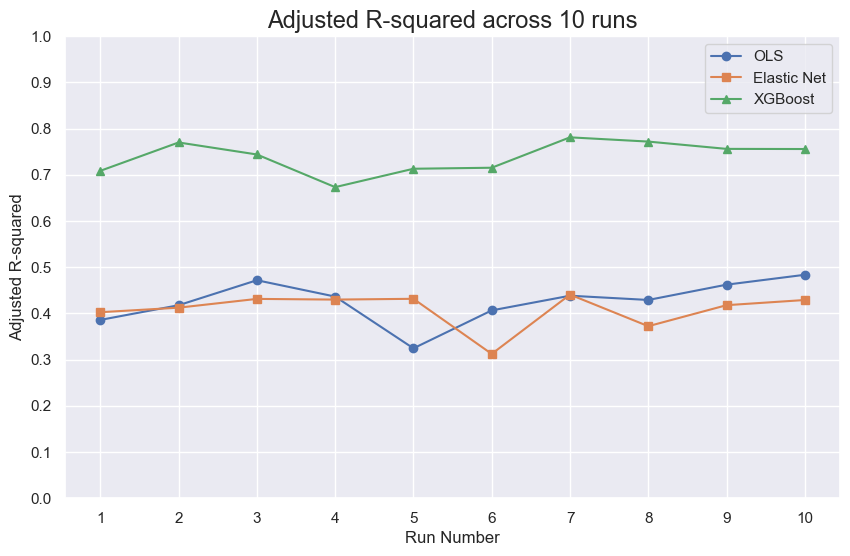

In [29]:
# Plot Adjusted R-squared results
plt.figure(figsize=(10,6))
plt.plot(rsquared_comp["Run_Number"], rsquared_comp["OLS"], label="OLS", marker="o")
plt.plot(rsquared_comp["Run_Number"], rsquared_comp["Elastic_Net"], label="Elastic Net", marker="s")
plt.plot(rsquared_comp["Run_Number"], rsquared_comp["XGBoost"], label="XGBoost", marker="^")
plt.xlabel("Run Number")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("Adjusted R-squared")
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title("Adjusted R-squared across 10 runs", fontsize=17)
plt.legend()
plt.show()

---
#### Visualize and compare mean absolute error

* OLS and Elastic Net again show very similar values (~0.038–0.042) across runs.
* XGBoost has dramatically lower MAE (~0.009–0.012), indicating far smaller average prediction errors.
* The consistency of the MAE line for XGBoost suggests reliable accuracy regardless of the random train/test split.

In [25]:
# Compare MAE
mae_comp = pd.DataFrame()
mae_comp["Run_Number"] = ols_results_df["Run_Number"]
mae_comp["OLS"] = ols_results_df["MAE"]
mae_comp["Elastic_Net"] = enet_results_df["MAE"]
mae_comp["XGBoost"] = xgb_results_df["MAE"]
mae_comp

,Run_Number,OLS,Elastic_Net,XGBoost
0,1,0.0416,0.0396,0.0113
1,2,0.0399,0.0384,0.0101
2,3,0.0407,0.0397,0.0102
3,4,0.0394,0.0406,0.0112
4,5,0.0383,0.0396,0.0099
5,6,0.0405,0.0380,0.0104
6,7,0.0403,0.0390,0.0094
7,8,0.0402,0.0382,0.0119
8,9,0.0403,0.0385,0.0111
9,10,0.0422,0.0390,0.0106


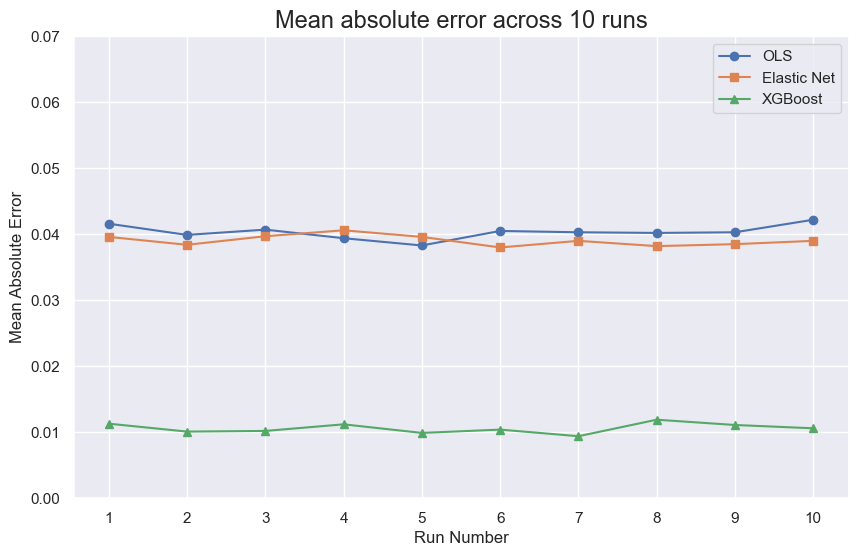

In [30]:
# Plot MAE results
plt.figure(figsize=(10,6))
plt.plot(mae_comp["Run_Number"], mae_comp["OLS"], label="OLS", marker="o")
plt.plot(mae_comp["Run_Number"], mae_comp["Elastic_Net"], label="Elastic Net", marker="s")
plt.plot(mae_comp["Run_Number"], mae_comp["XGBoost"], label="XGBoost", marker="^")
plt.xlabel("Run Number")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("Mean Absolute Error")
plt.yticks(np.arange(0.0, 0.07, 0.01))
plt.title("Mean absolute error across 10 runs", fontsize=17)
plt.legend()
plt.show()

---
#### Visualize and compare RMSE

* OLS and Elastic Net RMSE are nearly identical in most runs (~0.072–0.086).
* XGBoost maintains a clear advantage with RMSE in the low 0.05–0.06 range, indicating fewer large errors.
* All three models have stable RMSE across runs, but the scale of difference between XGBoost and the others reinforces the strength of its fit.

In [27]:
# Compare MAE
rmse_comp = pd.DataFrame()
rmse_comp["Run_Number"] = ols_results_df["Run_Number"]
rmse_comp["OLS"] = ols_results_df["RMSE"]
rmse_comp["Elastic_Net"] = enet_results_df["RMSE"]
rmse_comp["XGBoost"] = xgb_results_df["RMSE"]
rmse_comp

,Run_Number,OLS,Elastic_Net,XGBoost
0,1,0.0855,0.0800,0.0616
1,2,0.0788,0.0785,0.0545
2,3,0.0856,0.0866,0.0534
3,4,0.0793,0.0868,0.0593
4,5,0.0716,0.0791,0.0548
5,6,0.0773,0.0722,0.0559
6,7,0.0809,0.0854,0.0494
7,8,0.0804,0.0788,0.0588
8,9,0.0850,0.0806,0.0580
9,10,0.0932,0.0827,0.0541


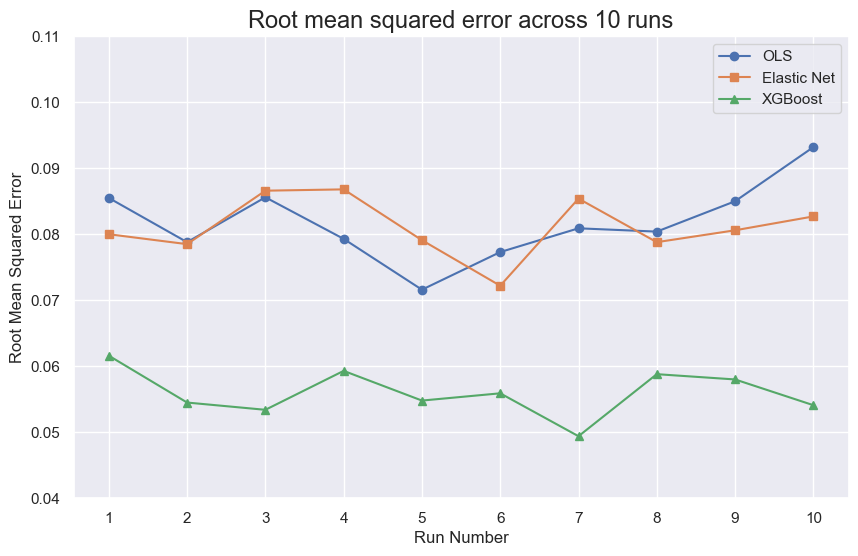

In [31]:
# Plot RMSE results
plt.figure(figsize=(10,6))
plt.plot(rmse_comp["Run_Number"], rmse_comp["OLS"], label="OLS", marker="o")
plt.plot(rmse_comp["Run_Number"], rmse_comp["Elastic_Net"], label="Elastic Net", marker="s")
plt.plot(rmse_comp["Run_Number"], rmse_comp["XGBoost"], label="XGBoost", marker="^")
plt.xlabel("Run Number")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("Root Mean Squared Error")
plt.yticks(np.arange(0.04, 0.11, 0.01))
plt.title("Root mean squared error across 10 runs", fontsize=17)
plt.legend()
plt.show()

---
#### Forecasted Player Statistics for 2025-26 NBA Season

In [54]:
# Import forecast stats
forecast_data = pd.read_csv("adjusted_forecasts_2026.csv")
forecast_data.head(10)

,Player,Feature,Season,Forecast,ArcLabel,ArcSlope,Forecast_Adjusted
0,Aaron Gordon,WS/48,1.0,0.844847,up,0.214130,0.887089
1,Aaron Gordon,PTS,1.0,0.685537,flat,0.028937,0.685537
2,Aaron Gordon,DWS,1.0,0.534623,flat,-0.021053,0.534623
3,Aaron Gordon,FTA,1.0,0.688754,flat,0.060000,0.688754
4,Aaron Gordon,USG%,1.0,0.610115,down,-0.160606,0.579609
5,Aaron Gordon,2P,1.0,0.506846,flat,0.022843,0.506846
6,Aaron Gordon,VORP,1.0,0.528433,up,0.142857,0.554854
7,Alec Burks,WS/48,1.0,0.756007,down,-0.172222,0.718206
8,Alec Burks,PTS,1.0,0.646426,down,-0.134184,0.614105
9,Alec Burks,DWS,1.0,0.382826,down,-0.173913,0.363685


In [55]:
# Pivot each player as a row
forecast_data = forecast_data.pivot(index="Player", columns="Feature", values="Forecast_Adjusted")
forecast_data.head()

Feature,2P,DWS,FTA,PTS,USG%,VORP,WS/48
Player,,,,,,,
Aaron Gordon,0.506846,0.534623,0.688754,0.685537,0.579609,0.554854,0.887089
Alec Burks,0.357122,0.363685,0.706669,0.614105,0.694071,0.338740,0.718206
Anfernee Simons,0.539332,0.428597,0.905129,0.920296,0.800323,0.481360,0.740747
Bobby Portis,0.543088,0.484506,0.633193,0.732265,0.750417,0.391810,0.750199
Bogdan Bogdanovic,0.463193,0.405900,0.640110,0.774802,0.644446,0.317499,0.708876


In [56]:
# Re-order forecasted columns to match that of the modeling dataset
forecast_data_ordered = forecast_data[X_scaled_final.columns]
forecast_data_ordered.head()

Feature,USG%,DWS,VORP,WS/48,FTA,2P,PTS
Player,,,,,,,
Aaron Gordon,0.579609,0.534623,0.554854,0.887089,0.688754,0.506846,0.685537
Alec Burks,0.694071,0.363685,0.338740,0.718206,0.706669,0.357122,0.614105
Anfernee Simons,0.800323,0.428597,0.481360,0.740747,0.905129,0.539332,0.920296
Bobby Portis,0.750417,0.484506,0.391810,0.750199,0.633193,0.543088,0.732265
Bogdan Bogdanovic,0.644446,0.405900,0.317499,0.708876,0.640110,0.463193,0.774802


In [57]:
# Import weights
forecast_weights_all = pd.read_csv("feature_weights_arima.csv")
forecast_weights_all

,Feature,ARIMA_RMSE,ARIMA_Weight,ARIMA_Weight_Normalized
0,WS/48,0.054616,18.309559,0.884723
1,VORP,0.901258,1.109560,0.053614
2,DWS,1.036282,0.964989,0.046629
3,USG%,3.468627,0.288299,0.013931
4,FTA,87.565048,0.011420,0.000552
5,2P,112.200470,0.008913,0.000431
6,PTS,398.829962,0.002507,0.000121


In [58]:
# Create a dictionary of feature weights
feature_weights_dict = dict(
    zip(forecast_weights_all["Feature"], forecast_weights_all["ARIMA_Weight_Normalized"])
)

feature_weights_dict_reordered = {key:feature_weights_dict[key] for key in X_scaled_final.columns}
feature_weights_dict_reordered

{'USG%': 0.0139306652629007,
 'DWS': 0.0466285205590758,
 'VORP': 0.053614235690587,
 'WS/48': 0.8847229417229281,
 'FTA': 0.0005518214938299,
 '2P': 0.000430660191338,
 'PTS': 0.0001211550793402}

In [59]:
# Apply weights to forecasted data
weighted_forecast_df = forecast_data_ordered * feature_weights_dict_reordered
weighted_forecast_df.head()

Feature,USG%,DWS,VORP,WS/48,FTA,2P,PTS
Player,,,,,,,
Aaron Gordon,0.008074,0.024929,0.029748,0.784828,0.000380,0.000218,0.000083
Alec Burks,0.009669,0.016958,0.018161,0.635414,0.000390,0.000154,0.000074
Anfernee Simons,0.011149,0.019985,0.025808,0.655356,0.000499,0.000232,0.000111
Bobby Portis,0.010454,0.022592,0.021007,0.663718,0.000349,0.000234,0.000089
Bogdan Bogdanovic,0.008978,0.018927,0.017022,0.627159,0.000353,0.000199,0.000094


In [60]:
# Forecast using XGBoost Model
y_forecast = final_model.predict(weighted_forecast_df)

In [61]:
# Add back to un-weighted forecast data set
forecast_data_ordered = forecast_data_ordered.copy()
forecast_data_ordered.loc[:, "Forecasted_Vote_Share_Scaled"] = y_forecast
forecast_data_ordered.head()

Feature,USG%,DWS,VORP,WS/48,FTA,2P,PTS,Forecasted_Vote_Share_Scaled
Player,,,,,,,,
Aaron Gordon,0.579609,0.534623,0.554854,0.887089,0.688754,0.506846,0.685537,-0.000137
Alec Burks,0.694071,0.363685,0.338740,0.718206,0.706669,0.357122,0.614105,-0.000006
Anfernee Simons,0.800323,0.428597,0.481360,0.740747,0.905129,0.539332,0.920296,-0.000006
Bobby Portis,0.750417,0.484506,0.391810,0.750199,0.633193,0.543088,0.732265,-0.000006
Bogdan Bogdanovic,0.644446,0.405900,0.317499,0.708876,0.640110,0.463193,0.774802,-0.000006


---
### Recap and findings

* Data Preparation – Combined player stats, voting results, and season metadata into a single dataset, standardized column formats, and ensured each row represented a unique player-season line.

* Exploratory Analysis – Identified VORP, PER, FG, DWS, WS, USG%, and WS/48 as key statistical leaders; observed large right-skews in many metrics and confirmed target points_share is heavily zero-inflated.

* Feature Selection (Random Forest) – Ran multiple random states to average importances, ranking VORP, PER, FG, DWS, WS, 2P, USG%, WS/48, PTS, and FTA as top predictors.

* Multicollinearity Check (VIF) – Sequentially removed highly collinear variables (FG, PER, WS) to reduce redundancy, keeping WS/48, USG%, DWS, VORP, FTA, 2P, and PTS.

* OLS Regression – Achieved mean Adj R² ≈ 0.43 (range 0.32–0.48) with MAE ~0.040 and RMSE ~0.081, showing stable results across seeds but missing non-linear effects.

* Coefficient & P-Value Analysis (OLS) – VORP, FTA, and USG% had the strongest positive weights, all with extremely small p-values, confirming their statistical significance.

* Elastic Net Regression – Delivered similar accuracy to OLS (mean Adj R² ≈ 0.41) with slight regularization benefits, indicating that heavy penalty terms were not necessary after careful feature selection.

* XGBoost Regression – Outperformed all models with mean Adj R² ≈ 0.74 (range 0.67–0.78), MAE ~0.010, and RMSE ~0.056, demonstrating the value of capturing non-linear relationships and feature interactions.

* Performance Visualization – Line charts for Adj R², MAE, and RMSE showed XGBoost’s consistent lead over linear models across all runs, with minimal variability between seeds.

* Overall Comparison – XGBoost reduced prediction error by over 70% relative to OLS and Elastic Net, highlighting that All-NBA vote share is influenced by patterns beyond purely linear effects.